In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
pd.options.display.max_columns=60
df=pd.read_parquet('data/pub_pcrevents0J6B5.parquet.gzip/part.0.parquet')
df.head()

,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,eArrest_18,eDisposition_12,eDisposition_19,eDisposition_16,eDisposition_21,eDisposition_22,eDisposition_23,eOutcome_01,eOutcome_02,ePatient_13,ePatient_15,ePatient_16,ePayment_01,ePayment_50,eResponse_05,eResponse_07,eResponse_15,eResponse_23,eScene_01,eScene_06,eScene_07,eScene_08,eScene_09,eSituation_02,eSituation_07,eSituation_08,eSituation_13,eSituation_01,eTimes_01,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,eDisposition_17,year_x,Masked_DestinationCounty,year_y,Masked_DestinationState
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,169609817.0,2301071,2302007,Not Recorded,3001001,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219005,4216005,4221011,7701003,7701003,7701003,7701003,9906001,88.0,2516009,2601011,2650007,2205005,2207003,2215003,2223005,9923003,2707005,9923001,7701003,Y92.23,9922001,2807011,2808021,2813005,01JAN2022:17:00:00,01JAN2022:17:01:30,01JAN2022:17:02:37,01JAN2022:17:04:59,01JAN2022:17:12:20,01JAN2022:17:13:00,01JAN2022:17:22:30,01JAN2022:17:49:22,01JAN2022:17:55:00,01JAN2022:18:20:00,4217005,2022,0J6B5,2022,E3XQM
1,169839596.0,2301025,2302001,Not Recorded,7701003,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219005,4216005,4221005,7701003,7701003,7701003,7701003,9906003,34.0,2516009,7701003,2650001,2205001,2207003,2215013,2223005,9923003,2707005,9923001,7701003,Y92.414,9922001,2807011,2808005,2813005,Not Recorded,Not Recorded,01JAN2022:00:22:16,01JAN2022:00:26:43,01JAN2022:00:34:23,01JAN2022:00:35:00,01JAN2022:00:55:09,01JAN2022:01:04:18,01JAN2022:01:18:55,01JAN2022:01:28:59,4217001,2022,0J6B5,2022,E3XQM


## Column Information
I went through the columns and made notes of the ones that seemed potentially interesting to look at, as some columns are semi-redundant

**PcrKey**: The unique number automatically assigned by EMS for each Patient Care Report (PCR), ex: 169609817.0	

**eDispatch_01**: Dispatch Reason. The dispatch reason reported to the responding unit. Gives a number code, ex: 2301019	(Cardiac Arrest/Death)

**eDispatch_02**: EMD Performed. Indication of whether Emergency Medical Dispatch was performed for this EMS event, ex: 2302007 (Yes, Unknown if Pre-Arrival Instructions Given)

**eArrest_01**: Cardiac Arrest. Indication of the presence of a cardiac arrest at any time during this EMS event, ex: 3001001 (No)

**eDisposition_16**: EMS Transport Method. The method of transport by this EMS Unit, ex: 4216005 (Ground-Ambulance)

**eDisposition_19**: Acuity Upon EMS Release of Patient. The acuity of the patient's condition after EMS release of the patient, ex: 4219001 (Critical (Red))

**eDisposition_22**: Hospital In-Patient Destination. The location within the hospital that the patient was taken directly by EMS, ex: 4222013 (Hospital-ICU)

**eDisposition_23**: Hospital Capability. The primary hospital capability associated with the patient's condition for this transport, ex: 9908001 (Behavioral Health)

**eOutcome_01**: Emergency Department Disposition. The known disposition of the patient from the Emergency Department, ex: 01 (Discharged to home or self care)

**eOutcome_02**: Hospital Disposition. The known disposition of the patient from the hospital, if admitted, ex: 50 (Discharged/transferred to Hospice-home)

**ePatient_13**: Gender. ex: 9906001 (Female)

**ePatient_15**: Age. ex: 27

**ePatient_16**: Age Units. ex: 25116009 (Years)

**ePayment_01**: Payment Method. The primary method of payment or type of insurance associated with this EMS encounter, ex: 2601003 (Medicaid)

**eTimes_01**: Call Date/Time. The date/time the phone rings requesting EMS services, ex: 01JAN2022:17:22:30

**eTimes_03**: Unit Notified by Dispatch Date/Time. May want to use this over eTimes_01 (mostly missing inputs), since its usage is Mandatory, ex: 01JAN2022:17:22:30

**eTimes_11**: Patient Arrived at Destination Date/Time. The date/time the responding unit arrived with the patient at the designation or transfer point

**Masked_DestinationCounty**: ex: 0J6B5

**Masked_DestinationState**: ex: E3XQM

## About the codes

https://nemsis.org/technical-resources/version-2/version-2-dataset-dictionaries/
has all of the codes and values in xls form, should we want to use many of these columns. Each column type has a different set of codes to work with, so it may be useful as a preprocessing step to convert the codes into something we can understand more easily.

In [275]:
pd.to_datetime('01JAN2022:17:13:00', format='%d%b%Y:%H:%M:%S')

Timestamp('2022-01-01 17:13:00')

In [276]:
L=[]
for i in range(0,531):
    L.append(pd.read_parquet('data/pub_pcrevents0J6B5.parquet.gzip/part.'+str(i)+'.parquet'))

L1=[]
for i in range(0,531):
    L1.append(pd.read_parquet('data/pub_pcrevents0JTMM.parquet.gzip/part.'+str(i)+'.parquet'))

In [277]:
df=pd.concat(L).reset_index() #concatenates all the data frames into one
df1=pd.concat(L1).reset_index()

In [278]:
df['DateTime']=pd.to_datetime(df['eTimes_03'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')
df1['DateTime']=pd.to_datetime(df1['eTimes_03'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')

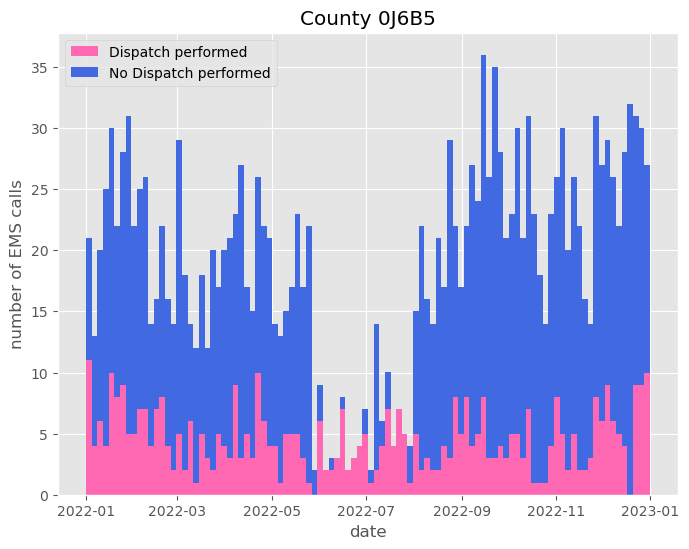

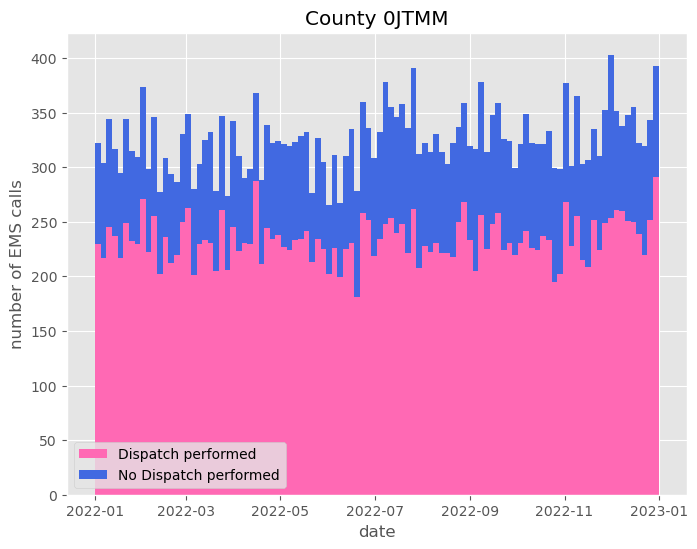

In [279]:
#County 0J6B5 histogram, EM Dispatch performed
x1=df.loc[(df.eDispatch_02!='2302001'),'DateTime']
x2=df.loc[(df.eDispatch_02=='2302001'),'DateTime'] #eDispatch_02=='2302001' means no EM Dispatch was performed
colors=['hotpink','royalblue']
plt.figure(figsize=(8,6))
plt.title("County 0J6B5")
plt.ylabel('number of EMS calls')
plt.xlabel('date')
plt.hist([x1,x2], bins=100, histtype='bar', stacked=True, color=colors, label=['Dispatch performed','No Dispatch performed'])
plt.legend()
plt.show()

#County 0JTMM histogram, EM Dispatch performed
x1=df1.loc[(df1.eDispatch_02!='2302001'),'DateTime']
x2=df1.loc[(df1.eDispatch_02=='2302001'),'DateTime'] 
colors=['hotpink','royalblue']
plt.figure(figsize=(8,6))
plt.title("County 0JTMM")
plt.ylabel('number of EMS calls')
plt.xlabel('date')
plt.hist([x1,x2], bins=100, histtype='bar', stacked=True,color=colors, label=['Dispatch performed','No Dispatch performed'])
plt.legend(loc='lower left')
plt.show()


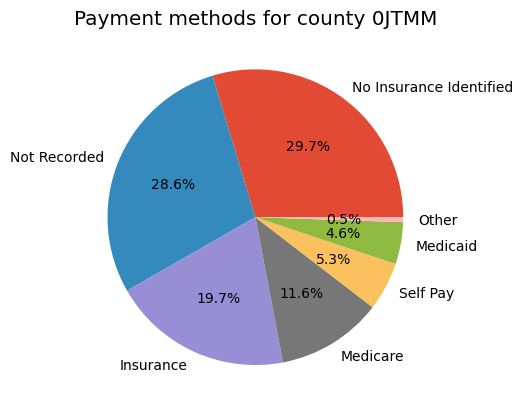

In [282]:
#Payment methods in county 0JTMM

#df1.ePayment_01.value_counts()
sizes=[9651,9294,6412,3763,1728,1490,97+31+20+11+10+4+1]
labels='No Insurance Identified', 'Not Recorded', 'Insurance', 'Medicare', 'Self Pay', 'Medicaid', 'Other'
fig, ax=plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Payment methods for county 0JTMM')
plt.show()

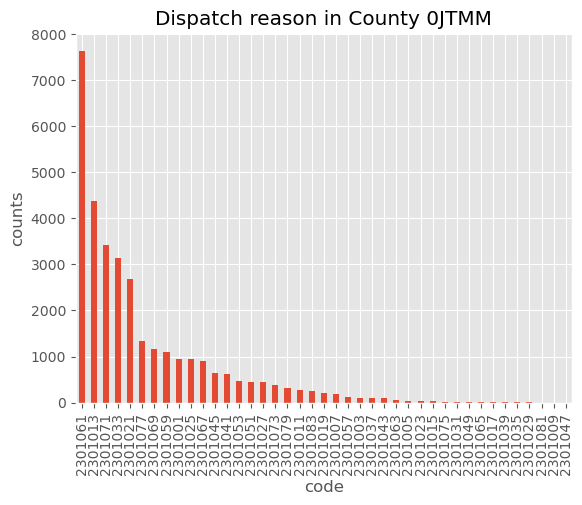

In [283]:
#df1.eDispatch_01.value_counts()
#df1.plot(y=df1.eDispatch_01.value_counts(), kind='pie')

# Calculate value counts
counts = df1['eDispatch_01'].value_counts()

# Plot value counts as bar chart
counts.plot(kind='bar')
plt.title('Dispatch reason in County 0JTMM')
plt.xlabel('code')
plt.ylabel('counts')
plt.show()

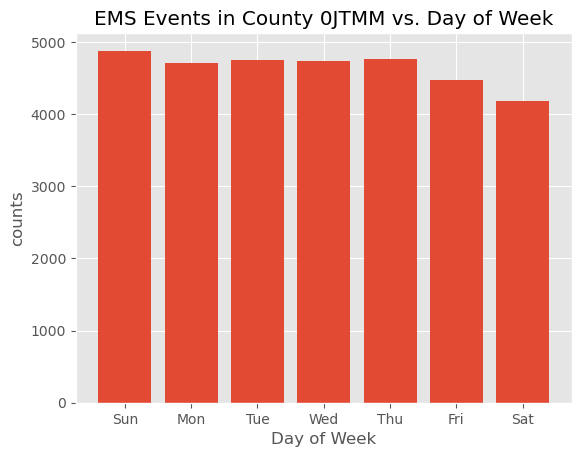

In [287]:
# Day of week
#plt.plot(df.DateTime.dt.dayofweek)

counts = df1['DateTime'].dt.dayofweek.value_counts().sort_index()
days_of_week = ['Sun','Mon','Tue', 'Wed', 'Thu','Fri','Sat']
labels=days_of_week
# Plot value counts as bar chart

#counts.plot(kind='bar', label=labels)
plt.figure()
plt.bar(height=counts, x=labels)
plt.title('EMS Events in County 0JTMM vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('counts')
plt.show()

In [285]:
# Plotting trends over each Week

#create new columns for WeekNum and WeekDay
df1['WeekNum']=df1.DateTime.apply(lambda x: x.isocalendar().week)
df1['WeekDay']=df1.DateTime.dt.dayofweek

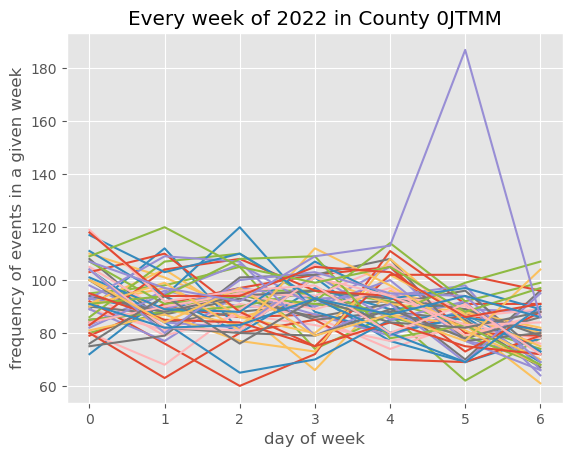

In [288]:
#plotting week days for each week number
df_w=df1.groupby(by='WeekNum').WeekDay.value_counts().unstack()
for i in range(1,53):
    plt.plot(df_w.loc[i].index, df_w.loc[i])
plt.title('Every week of 2022 in County 0JTMM')
plt.xlabel('day of week')
plt.ylabel('frequency of events in a given week')
plt.show()